In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,Price,RAM_Expandable,RAM,RAM_TYPE(DDR),Display_type,Processor_Tier,Processor_Speed(Ghz),Display_Tier,GPU_Tier,SSD(GB),...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Other,Brand_Samsung,Processor_Apple,Processor_Intel,GPU_Apple,GPU_Intel,GPU_NVIDIA
0,127011.5,1,8,4,0,1.0,4.0,2,1,512,...,False,True,False,False,False,False,False,False,False,False
1,274750.0,1,16,5,0,1.0,3.5,2,3,512,...,False,False,False,False,False,False,True,False,False,True
2,194215.0,1,8,4,0,1.0,4.0,2,2,512,...,True,False,False,False,False,False,True,False,True,False
3,76965.0,0,8,4,0,0.0,1.5,2,1,512,...,False,False,False,True,False,False,True,False,True,False
4,122465.0,1,16,4,0,1.0,2.5,1,2,512,...,False,False,False,False,False,False,True,False,True,False


In [4]:
df.columns

Index(['Price', 'RAM_Expandable', 'RAM', 'RAM_TYPE(DDR)', 'Display_type',
       'Processor_Tier', 'Processor_Speed(Ghz)', 'Display_Tier', 'GPU_Tier',
       'SSD(GB)', 'HDD(GB)', 'Brand_Acer', 'Brand_Apple', 'Brand_Dell',
       'Brand_HP', 'Brand_Lenovo', 'Brand_MSI', 'Brand_Other', 'Brand_Samsung',
       'Processor_Apple', 'Processor_Intel', 'GPU_Apple', 'GPU_Intel',
       'GPU_NVIDIA'],
      dtype='object')

### Feature-Target Split

In [5]:
# Target variable
y = df["Price"]

# drop target column
X = df.drop(columns=["Price"])

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Verify all features are numeric
print("\nFeature types:\n", X.dtypes.value_counts())


Features shape: (3537, 23)
Target shape: (3537,)

Feature types:
 bool       13
int64       8
float64     2
Name: count, dtype: int64


### Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 2829 samples
Test set: 708 samples


### Base Model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 2829, number of used features: 21
[LightGBM] [Info] Start training from score 217557.041888
Baseline LightGBM Performance:
RMSE: 44239.15
MAE: 31358.25
R² Score: 0.80


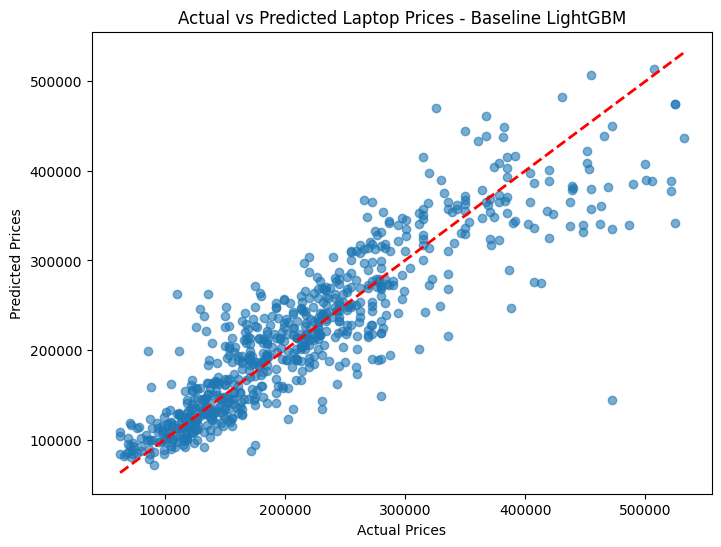

In [7]:
# Initialize baseline LGBMRegressor with default parameters
baseline_model = lgb.LGBMRegressor(random_state=42)

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = baseline_model.predict(X_test)


# Step 5: Evaluate Baseline Performance

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
mae = mean_absolute_error(y_test, y_pred)           # MAE
r2 = r2_score(y_test, y_pred)                       # R² score

print("Baseline LightGBM Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices - Baseline LightGBM")
plt.show()

### Hyper parameter tuning 

- Below code takes hours. Therefore this code run in colabnotebook to get result quicker. Those resultant parameters manually get and used in the best model

In [8]:
# from sklearn.model_selection import RandomizedSearchCV

# # new model initialization
# tuning_model = lgb.LGBMRegressor(
#     objective='regression',
#     random_state=42,
#     n_estimators=1000 
# )

# # parameter grid
# param_dist = {
#     'num_leaves': [31, 50, 70, 100],
#     'max_depth': [-1, 10, 20, 30],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'min_child_samples': [10, 20, 30, 50],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'lambda_l1': [0, 0.1, 0.5, 1.0],
#     'lambda_l2': [0, 0.1, 0.5, 1.0]
# }

# # randomized search
# random_search = RandomizedSearchCV(
#     estimator=tuning_model,
#     param_distributions=param_dist,
#     n_iter=50, # 50 random combinations are considered
#     scoring='neg_root_mean_squared_error',
#     cv=5,       
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the search on the training data
# random_search.fit(X_train, y_train)



In [9]:
# print("\nBest Parameters found by RandomizedSearchCV:")
# print(random_search.best_params_)
# print(f"Best CV RMSE: {-random_search.best_score_:.2f}")

### Final Model

In [10]:
from lightgbm import early_stopping, log_evaluation

# get best params from tuning
#best_params = random_search.best_params_

# define final model
final_model = lgb.LGBMRegressor(
    #**best_params,
    subsample=1.0,
    num_leaves=31,
    min_child_samples=10,
    max_depth=30,
    learning_rate=0.01,
    lambda_l2=0.1,
    lambda_l1=1.0,
    colsample_bytree=0.8,
    n_estimators=5000,  # large number so early stopping can work
    objective='regression',
    random_state=42
)

# fit with new-style callbacks
final_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=0)  # suppress per-iteration logs
    ]
)

print(f"Best iteration (trees actually used): {final_model.best_iteration_}")


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 2829, number of used features: 21
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Info] Start training from score 217557.041888
Training until validation scores do

### Evaluate final model using test data

In [11]:
y_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration_)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nOptimized LightGBM Performance on Test Data:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0

Optimized LightGBM Performance on Test Data:
RMSE: 44403.96
MAE: 31371.71
R² Score: 0.80


### Visualize Actual vs Predicted Prices

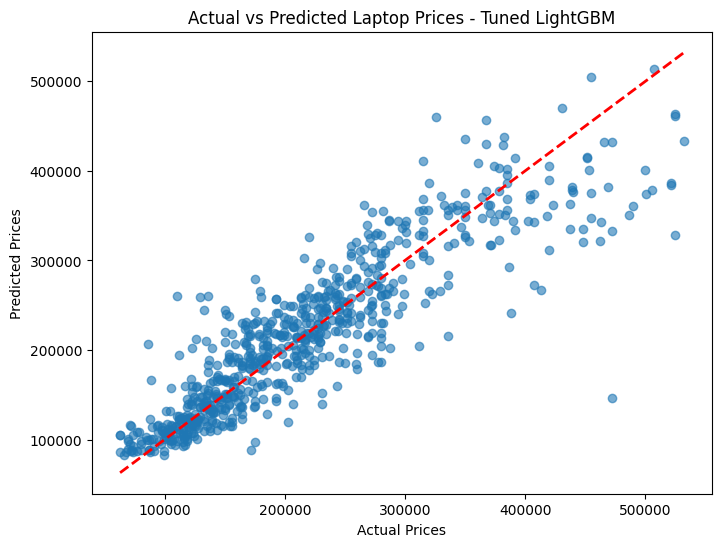

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices - Tuned LightGBM")
plt.show()

### Feature importance

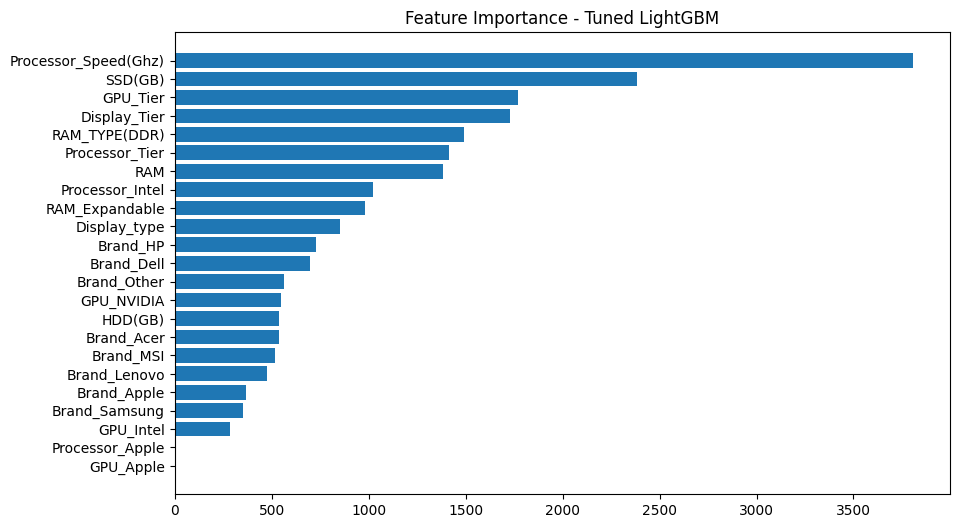

In [13]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importances['Feature'], importances['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Tuned LightGBM")
plt.show()

### Save model

In [14]:
import joblib

joblib.dump(final_model, "lightGBM_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [15]:
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")
print(f"Feature names saved! Total features: {len(feature_names)}")

print("\nFeature columns:")
for i, col in enumerate(feature_names, 1):
    print(f"{i}. {col}")

Feature names saved! Total features: 23

Feature columns:
1. RAM_Expandable
2. RAM
3. RAM_TYPE(DDR)
4. Display_type
5. Processor_Tier
6. Processor_Speed(Ghz)
7. Display_Tier
8. GPU_Tier
9. SSD(GB)
10. HDD(GB)
11. Brand_Acer
12. Brand_Apple
13. Brand_Dell
14. Brand_HP
15. Brand_Lenovo
16. Brand_MSI
17. Brand_Other
18. Brand_Samsung
19. Processor_Apple
20. Processor_Intel
21. GPU_Apple
22. GPU_Intel
23. GPU_NVIDIA
